<a href="https://colab.research.google.com/github/mingjiez912/Machine_Learning_Lab/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.) Preprocess your data into scaled input variables and an output variable


In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [7]:
df = pd.read_csv("/content/gdrive/MyDrive/CLV.csv")


In [8]:
df

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,23405.987980,71941,2,198.234764,18,0,1,1,1,0,0,0,0,1,0,1,0
9130,9130,3096.511217,21604,1,379.200000,14,0,1,0,1,0,0,0,1,0,1,0,0
9131,9131,8163.890428,0,2,790.784983,9,0,1,1,0,0,0,1,1,0,0,0,1
9132,9132,7524.442436,21941,3,691.200000,34,1,0,1,1,0,0,0,0,1,0,1,0


In [9]:
X = df.drop(['Unnamed: 0', 'Customer Lifetime Value'], axis = 1)
y = df['Customer Lifetime Value']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [13]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [14]:
clf = MLPRegressor()

params = {
    "hidden_layer_sizes": [(10,), (20,5,), (10,5), (20,10,5), (50,20,10)], 
    "activation" : ['relu','logistic']
}

In [15]:
grid = GridSearchCV(clf, params, cv = 5)
grid.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'logistic'],
                         'hidden_layer_sizes': [(10,), (20, 5), (10, 5),
                                                (20, 10, 5), (50, 20, 10)]})

In [16]:
print(grid.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': (50, 20, 10)}


# 3.) Train a model with the optimal solution from GridSearch

In [24]:
model = MLPRegressor(**grid.best_params_).fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# 4.) What are the in-sample and out of sample MSEs

In [19]:
from sklearn.metrics import mean_squared_error

In [25]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [26]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [27]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print("In-sample MSE:", mse_train)
print("Out-sample MSE:", mse_test)

In-sample MSE: 42975105.35736697
Out-sample MSE: 42202825.55342339


# 5.) Build a Keras with the architecture defined by GridSearchCV

In [28]:
import keras.models
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense

In [29]:
model = Sequential()
model.add(Dense(50, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'softmax'))

In [31]:
model.compile(loss = 'mse', optimizer = Adam(lr = 0.01))
model.fit(X_train, y_train, batch_size = 32, epochs = 100)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 112791600.0000
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 112791632.0000
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 112791600.0000
Epoch 4/100
200/200 [==============================] - 0s 1ms/step - loss: 112791648.0000
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 112791616.0000
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 112791608.0000
Epoch 7/100
200/200 [==============================] - 0s 1ms/step - loss: 112791576.0000
Epoch 8/100
200/200 [==============================] - 0s 1ms/step - loss: 112791632.0000
Epoch 9/100
200/200 [==============================] - 0s 1ms/step - loss: 112791568.0000
Epoch 10/100
200/200 [==============================] - 0s 1ms/step - loss: 112791584.0000
Epoch 11/100
200/200 [==============================] - 0s 1ms/step - loss: 112791616.0000
Epoch 12

# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                850       
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,091
Trainable params: 2,091
Non-trainable params: 0
_________________________________________________________________


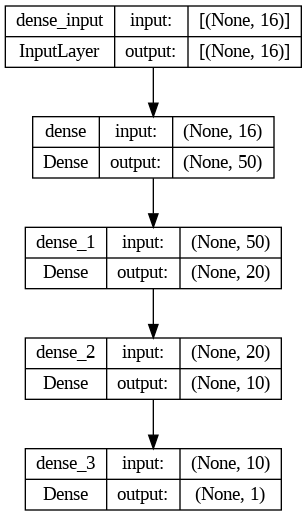

In [33]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes = True)

In [46]:
from ann_visualizer.visualize import ann_viz
ann_viz(model, view = True, title = 'NN Viz', filename = 'network.gv')

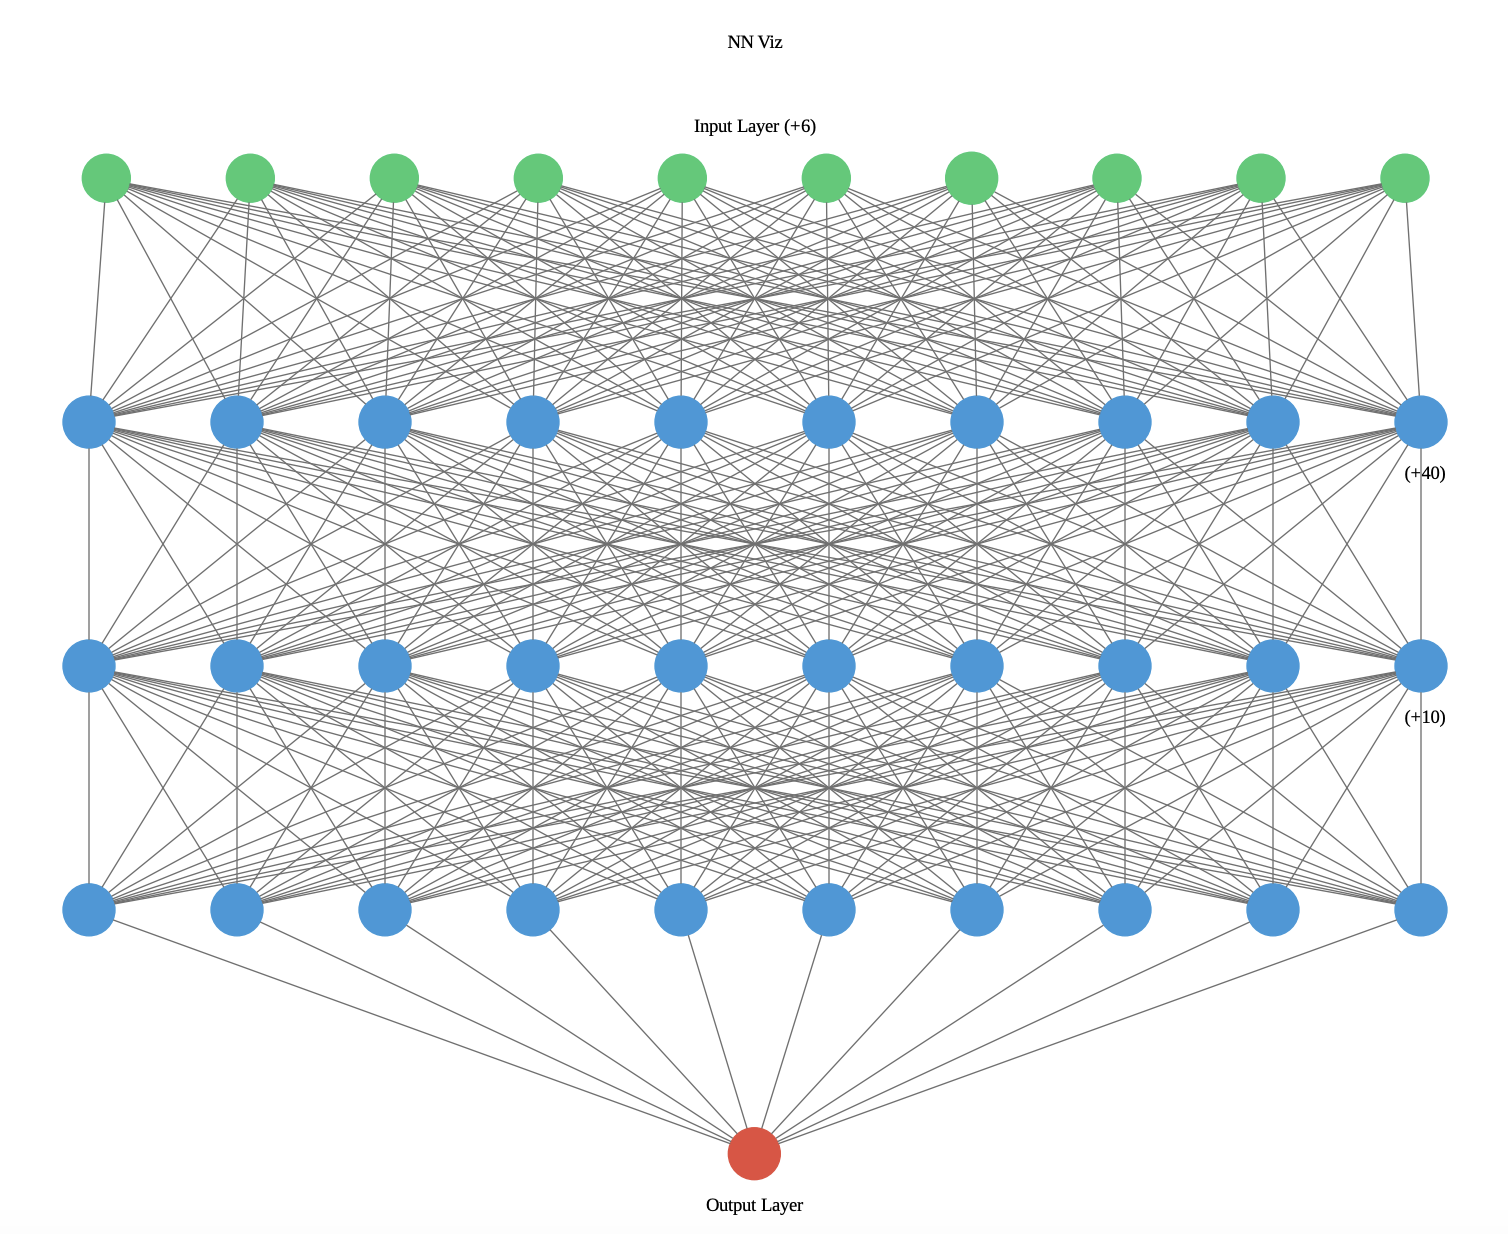